In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

flores_ferts = pd.read_csv('model_fertilities_using_library.csv').drop(columns=['Unnamed: 0'])
flores_ferts.head()

,language,corpus,fertility,tokens,model
0,Arab,يق أورو سنين، اوق علمون دري فکولتس کدوکترن يون...,2.078433,"['▁', 'يق', '▁', 'أورو', '▁', 'سنين،', '▁', 'ا...",google/flan-t5-xxl
1,Latn,"Bak uroe Senin, awak ilmuwan dari Fakultas Ked...",3.436214,"['▁Bak', '▁', 'ur', 'o', 'e', '▁Sen', 'in', ',...",google/flan-t5-xxl
2,Ethi,ሰኞ እለት፣ በስታንፎርድ ዩኒቨርሲቲ የህክምና ትምህርት ቤት ህዋሶችን በአ...,2.040513,"['▁', 'ሰኞ', '▁', 'እለት፣', '▁', 'በስታንፎርድ', '▁', ...",google/flan-t5-xxl
3,Beng,"সোমবাৰে, ষ্টেনফ'ৰ্ড ইউনিভাৰচিটি স্কুল অৱ মেডিচ...",2.092096,"['▁', 'সোমবাৰে', ',', '▁', 'ষ্টেনফ', ""'"", 'ৰ্ড...",google/flan-t5-xxl
4,Deva,सोमवरवा का स्टैनफोर्ड यूनिवर्सिटी का स्कूल ऑफ ...,2.081588,"['▁', 'सोमवरवा', '▁', 'का', '▁', 'स्टैनफोर्ड',...",google/flan-t5-xxl


In [2]:
model_summaries = flores_ferts.groupby('model')['fertility'].describe()
model_summaries

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
CohereForAI/aya-101,31.0,6.329727,7.314511,2.104427,2.600421,3.012729,6.108890,30.143799
bigscience/bloomz-7b1,31.0,11.939275,12.950681,1.514487,2.258471,6.058881,16.073491,44.211665
bigscience/mt0-xxl-mt,31.0,6.329727,7.314511,2.104427,2.600421,3.012729,6.108890,30.143799
google/flan-t5-xxl,31.0,2.602669,1.048444,2.040513,2.090918,2.143660,2.222407,5.829346
google/gemma-2-9b,31.0,8.476900,7.593213,2.120740,3.635907,5.591380,9.177739,28.918156
google/gemma-7b,31.0,8.476900,7.593213,2.120740,3.635907,5.591380,9.177739,28.918156
meta-llama/Llama-3.2-1B-Instruct,31.0,16.422128,14.790794,2.402349,8.412023,12.358785,16.518693,72.014839
microsoft/Phi-3.5-mini-instruct,31.0,19.731495,16.967171,2.618073,8.457879,12.159142,25.789270,62.217310
neulab/Pangea-7B,31.0,13.045482,10.661878,2.400613,6.380682,9.187998,16.370472,48.148746


In [3]:
models = flores_ferts['model'].unique()
values = []
for model in models:
    subset = flores_ferts[flores_ferts['model']==model]
    values.append(np.array(subset['fertility']))

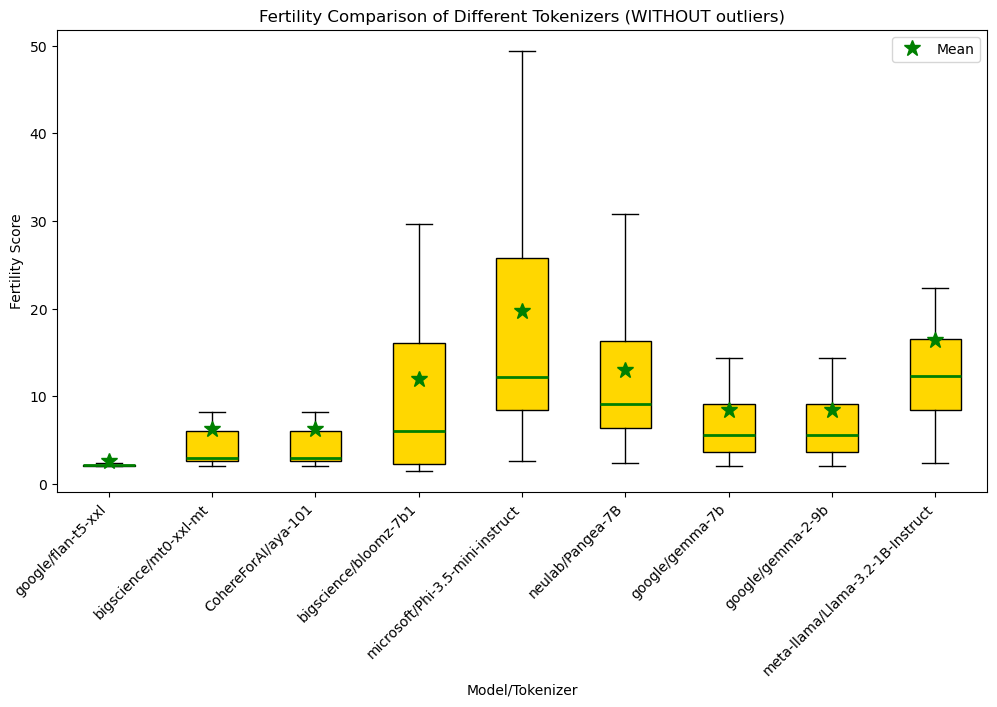

In [4]:
plt.figure(figsize=(12, 6))

boxprops = dict(facecolor='gold', color='black') 
medianprops = dict(color='green', linewidth=2)  

plt.boxplot(
    values,
    labels=models,
    vert=True,
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    showfliers=False
)

for i, data in enumerate(values, start=1):
    mean = np.mean(data)
    plt.plot(i, mean, 'g*', markersize=12, label='Mean' if i == 1 else "")  
plt.legend(loc='upper right')

plt.xticks(rotation=45, ha='right')
plt.title('Fertility Comparison of Different Tokenizers (WITHOUT outliers)')
plt.xlabel('Model/Tokenizer')
plt.ylabel('Fertility Score')
plt.show()

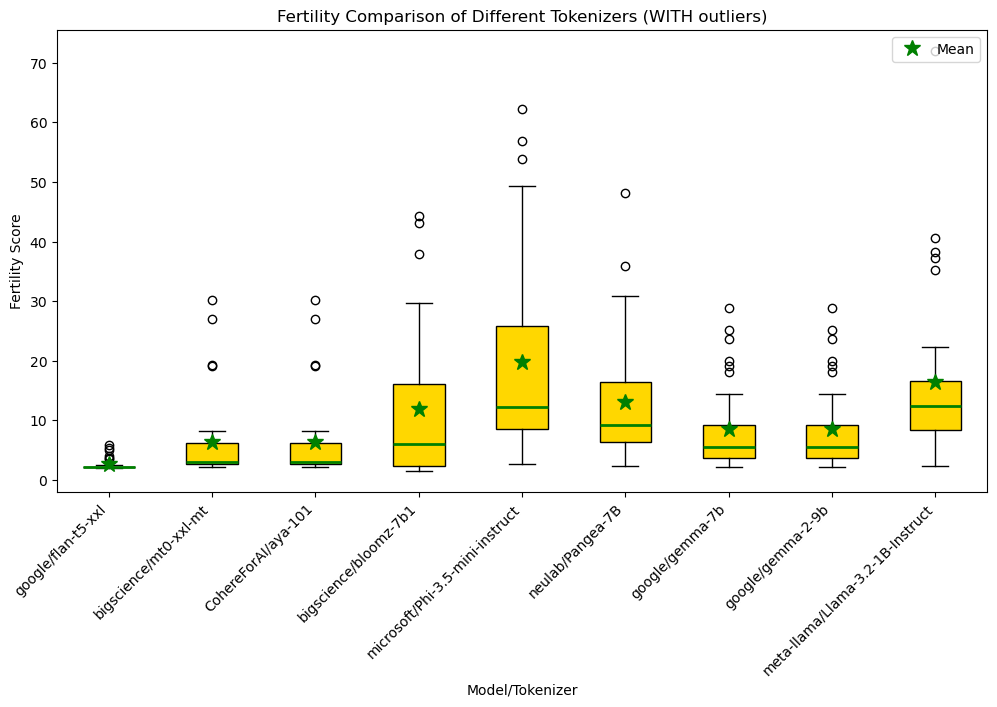

In [5]:
plt.figure(figsize=(12, 6))

boxprops = dict(facecolor='gold', color='black') 
medianprops = dict(color='green', linewidth=2)  

plt.boxplot(
    values,
    labels=models,
    vert=True,
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    showfliers=True
)

for i, data in enumerate(values, start=1):
    mean = np.mean(data)
    plt.plot(i, mean, 'g*', markersize=12, label='Mean' if i == 1 else "")  
plt.legend(loc='upper right')

plt.xticks(rotation=45, ha='right')
plt.title('Fertility Comparison of Different Tokenizers (WITH outliers)')
plt.xlabel('Model/Tokenizer')
plt.ylabel('Fertility Score')
plt.show()

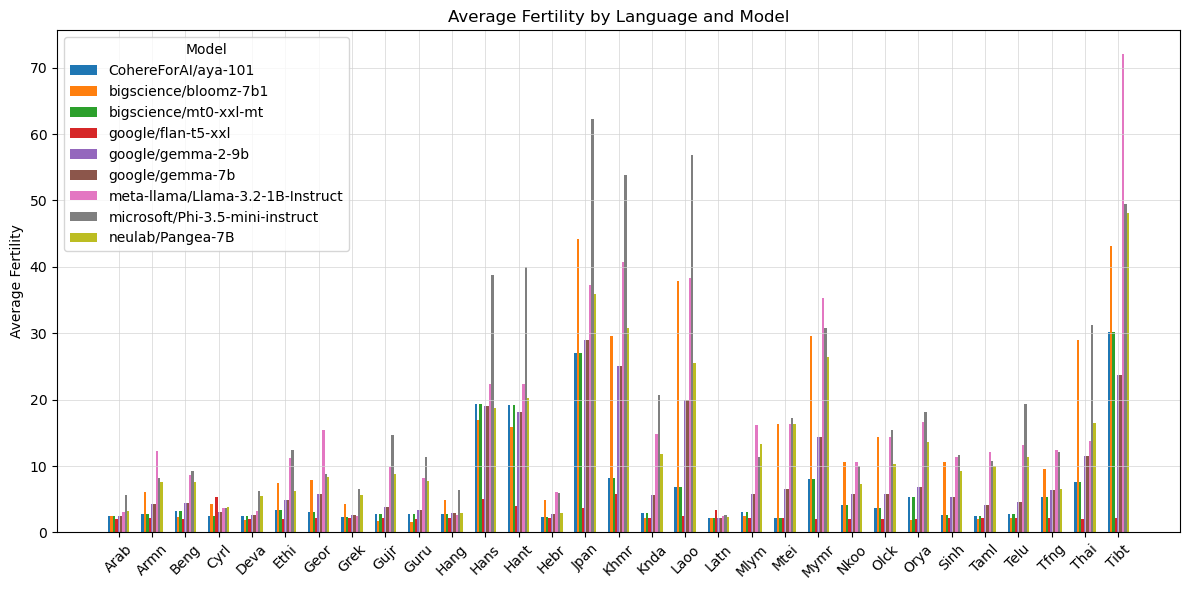

In [6]:
grouped_fertilities = flores_ferts.groupby(['language', 'model'], as_index=False)['fertility'].mean()
pivot_df = grouped_fertilities.pivot(index='language', columns='model', values='fertility')

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 2
languages = pivot_df.index
models = pivot_df.columns

x = np.arange(len(languages)) * (1 + 3 * len(models))  # Add space between languages 

for i, model in enumerate(models): # Create bars for each model
    ax.bar(x + i * bar_width, pivot_df[model], bar_width, label=model)

ax.set_xticks(x + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(languages)
ax.set_ylabel('Average Fertility')
ax.set_title('Average Fertility by Language and Model')
ax.legend(title='Model')
plt.xticks(rotation=45)
plt.grid(color='#d4d4d4', linewidth=0.5)
plt.tight_layout()
plt.show()